In [128]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from statsmodels.api import OLS
import seaborn as sns

# Preprocessing

In [ ]:
passerbys = pd.read_csv(r"C:\Users\Lenovo\Documents\passerbys.csv")
passerbys.isna().sum()

In [ ]:
weather = pd.read_csv(r"C:\Users\Lenovo\Documents\weather.csv")
weather.isna().sum()

In [129]:
weather['DATE'] = pd.to_datetime(weather['DATE'])
weather = weather.set_index('DATE', drop=False)
passerbys['Date'] = pd.to_datetime(passerbys['Date'])
passerbys = passerbys.set_index('Date', drop=False)

passerbys = passerbys.resample('D').sum()  # аггрецаия данных

passerbys['d'] = passerbys.index.dayofweek

df = pd.merge(passerbys, weather, left_index=True, right_index=True)  # датасет со всеми фичами

df = pd.merge(df, pd.get_dummies(df['d'], prefix='d'), left_index=True, right_index=True).dropna()

cal = calendar()
tmp = cal.holidays(start=df['DATE'].min(), end=df['DATE'].max())
df['hd'] = df['DATE'].isin(tmp).astype(int)

df['t'] = range(1,len(df)+1) # trend

X1 = df[['TAVG', 'PRCP', 'd_0', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6']]
X2 = df[['TAVG', 'PRCP', 'd_0', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'hd']]
X3 = df[['TAVG', 'PRCP', 'd_0', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'hd', 't']]
y1 = df['Fremont Bridge East Sidewalk']
y2 = df['Fremont Bridge West Sidewalk']

In [138]:
X3

,TAVG,PRCP,d_0,d_1,d_2,d_3,d_4,d_5,d_6,hd,t
2013-04-01,12.8,0.0,1,0,0,0,0,0,0,0,1
2013-04-02,11.5,0.0,0,1,0,0,0,0,0,0,2
2013-04-03,11.7,0.0,0,0,1,0,0,0,0,0,3
2013-04-04,12.0,8.4,0,0,0,1,0,0,0,0,4
2013-04-05,12.2,18.5,0,0,0,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...
2019-06-24,14.7,0.0,1,0,0,0,0,0,0,0,2276
2019-06-25,16.6,0.0,0,1,0,0,0,0,0,0,2277
2019-06-28,16.1,0.0,0,0,0,0,1,0,0,0,2278
2019-06-29,18.0,0.0,0,0,0,0,0,1,0,0,2279


# Model

In [130]:
def lin_model(y, X,pred=False):
    model = OLS(y, X)
    res = model.fit()
    y1_pred = res.predict(X)
    print(res.summary())
    if pred:
        return y1_pred

#### Days of week

In [131]:
lin_model(y1,X1)

                                 OLS Regression Results                                 
Dep. Variable:     Fremont Bridge East Sidewalk   R-squared:                       0.729
Model:                                      OLS   Adj. R-squared:                  0.728
Method:                           Least Squares   F-statistic:                     764.0
Date:                          Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                                  15:37:50   Log-Likelihood:                -16369.
No. Observations:                          2280   AIC:                         3.276e+04
Df Residuals:                              2271   BIC:                         3.281e+04
Df Model:                                     8                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [132]:
lin_model(y2,X1)

                                 OLS Regression Results                                 
Dep. Variable:     Fremont Bridge West Sidewalk   R-squared:                       0.714
Model:                                      OLS   Adj. R-squared:                  0.713
Method:                           Least Squares   F-statistic:                     710.2
Date:                          Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                                  15:37:50   Log-Likelihood:                -16977.
No. Observations:                          2280   AIC:                         3.397e+04
Df Residuals:                              2271   BIC:                         3.402e+04
Df Model:                                     8                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

#### Days of week + holidays

In [133]:
lin_model(y1,X2)

                                 OLS Regression Results                                 
Dep. Variable:     Fremont Bridge East Sidewalk   R-squared:                       0.749
Model:                                      OLS   Adj. R-squared:                  0.748
Method:                           Least Squares   F-statistic:                     752.7
Date:                          Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                                  15:37:50   Log-Likelihood:                -16282.
No. Observations:                          2280   AIC:                         3.258e+04
Df Residuals:                              2270   BIC:                         3.264e+04
Df Model:                                     9                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [134]:
lin_model(y2,X2)

                                 OLS Regression Results                                 
Dep. Variable:     Fremont Bridge West Sidewalk   R-squared:                       0.739
Model:                                      OLS   Adj. R-squared:                  0.738
Method:                           Least Squares   F-statistic:                     712.9
Date:                          Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                                  15:37:50   Log-Likelihood:                -16876.
No. Observations:                          2280   AIC:                         3.377e+04
Df Residuals:                              2270   BIC:                         3.383e+04
Df Model:                                     9                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

#### Days of week + holidays + t

In [135]:
lin_model(y1,X3)

                                 OLS Regression Results                                 
Dep. Variable:     Fremont Bridge East Sidewalk   R-squared:                       0.768
Model:                                      OLS   Adj. R-squared:                  0.767
Method:                           Least Squares   F-statistic:                     749.5
Date:                          Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                                  15:37:50   Log-Likelihood:                -16194.
No. Observations:                          2280   AIC:                         3.241e+04
Df Residuals:                              2269   BIC:                         3.247e+04
Df Model:                                    10                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [136]:
lin_model(y2,X3)

                                 OLS Regression Results                                 
Dep. Variable:     Fremont Bridge West Sidewalk   R-squared:                       0.795
Model:                                      OLS   Adj. R-squared:                  0.794
Method:                           Least Squares   F-statistic:                     878.8
Date:                          Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                                  15:37:50   Log-Likelihood:                -16600.
No. Observations:                          2280   AIC:                         3.322e+04
Df Residuals:                              2269   BIC:                         3.329e+04
Df Model:                                    10                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [139]:
model = OLS(y1, X3)
res = model.fit()

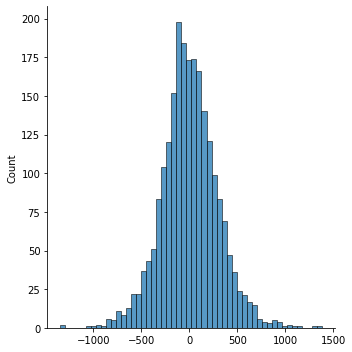

In [149]:
sns.displot(res.resid)

# Вывод
Все модели показали себя довольно хорошо. При этом наилучшие результаты были достигнуты при учете дней недели, праздников и переменной времени. Если рассматривать последнюю модель, то можно сделать вывод, относительно критерия жако бера, говорящий о ненормальности распределения данных и возможной смещенности оценки,при этом зрительно распределение незначительно отличается от нормального